# CIFAR-10 Manifold learning algorithms

In [23]:
!pip --quiet install tensorflow
!pip --quiet install umap

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

In [25]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from keras.datasets import cifar10

In [26]:
# Load CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

In [27]:
x_train = x_train[:10000]
y_train = y_train[:10000]

In [28]:
# Normalize the data
x_train = x_train / 255.

In [29]:
# Flatten each image
x_train_flat = np.reshape(x_train, (x_train.shape[0], -1))

In [30]:
# colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'purple', 'orange']
colors = ['indigo', 'teal', 'pink', 'lavender', 'gold', 'brown', 'turquoise', 'maroon', 'olive', 'coral']

In [31]:
# Define a function to plot the data in 2D
def plot_embedding(embedding, title=None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for i in range(10):
        idx = np.where(y_train == i)[0]
        ax.scatter(embedding[idx, 0], embedding[idx, 1], c=colors[i], label=i)
    ax.legend()
    if title is not None:
        ax.set_title(title)

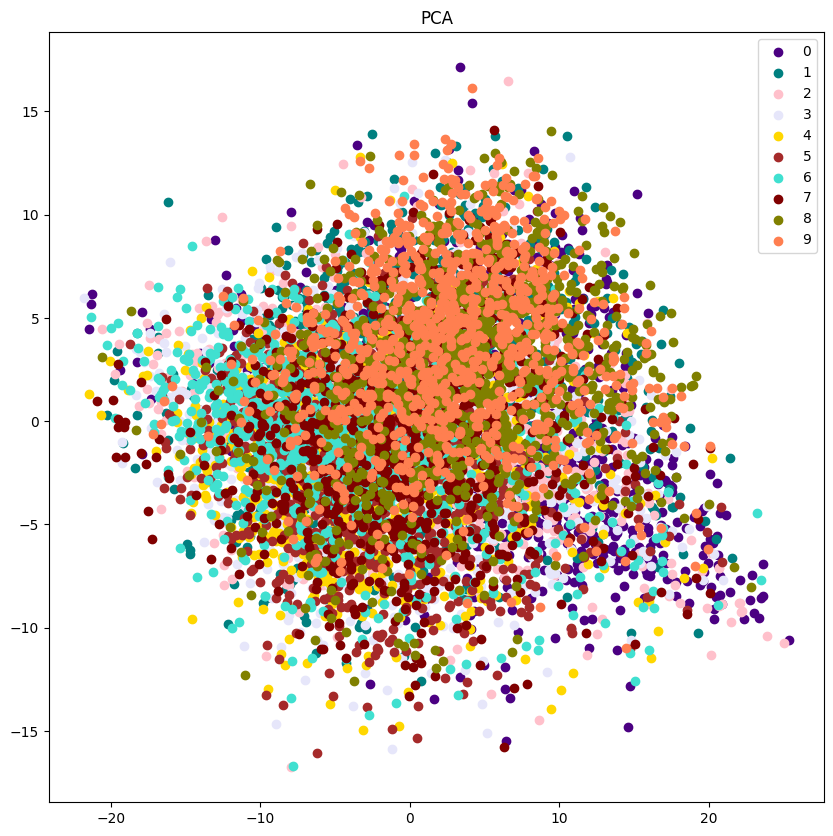

In [17]:
# Perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_flat)
plot_embedding(x_pca, title='PCA')

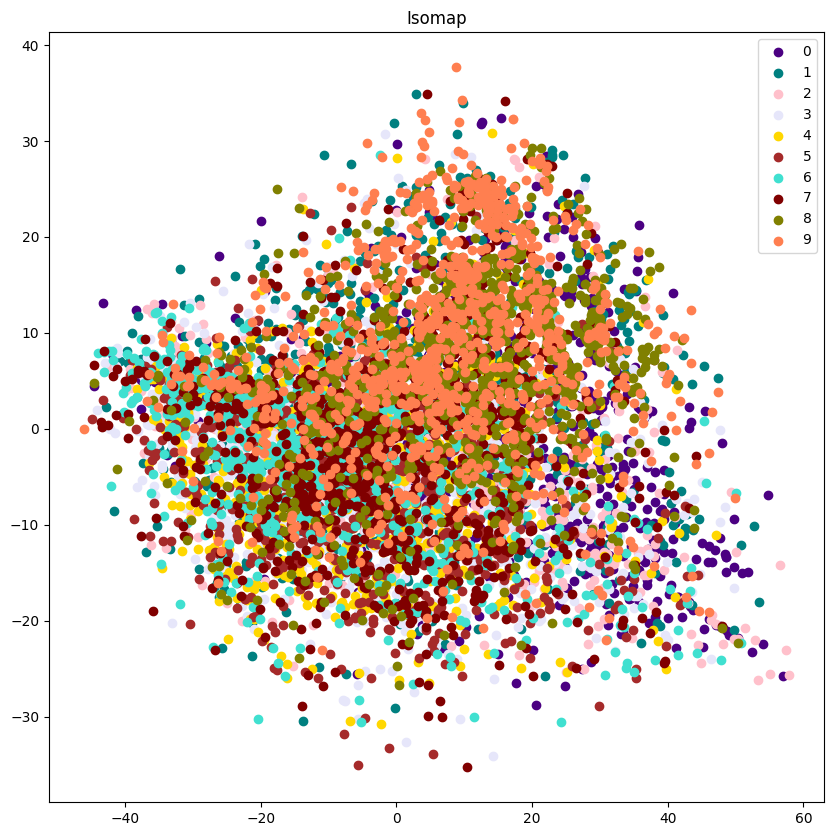

In [18]:
# Perform Isomap
isomap = Isomap(n_components=2)
x_isomap = isomap.fit_transform(x_train_flat)
plot_embedding(x_isomap, title='Isomap')

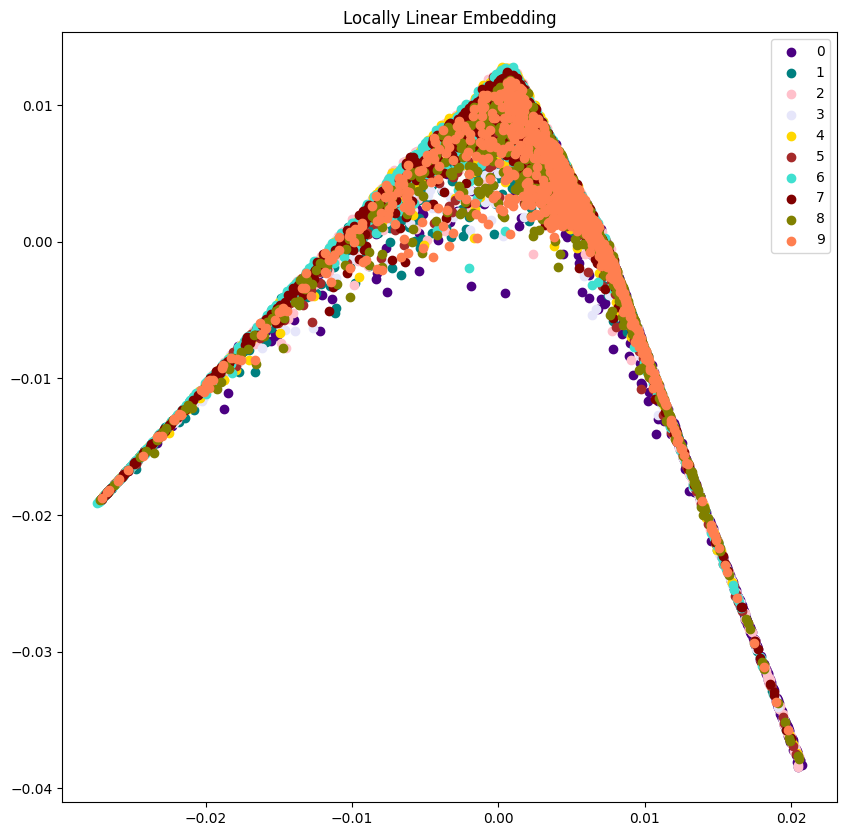

In [19]:
# Perform Locally Linear Embedding
lle = LocallyLinearEmbedding(n_components=2)
x_lle = lle.fit_transform(x_train_flat)
plot_embedding(x_lle, title='Locally Linear Embedding')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


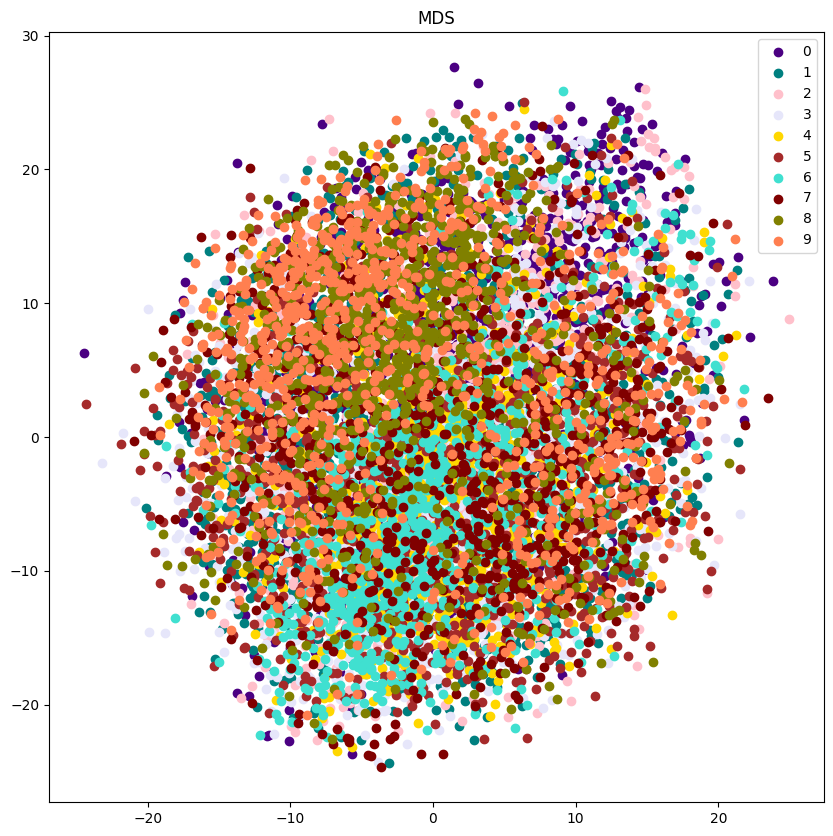

In [20]:
# Perform MDS
mds = MDS(n_components=2)
x_mds = mds.fit_transform(x_train_flat)
plot_embedding(x_mds, title='MDS')

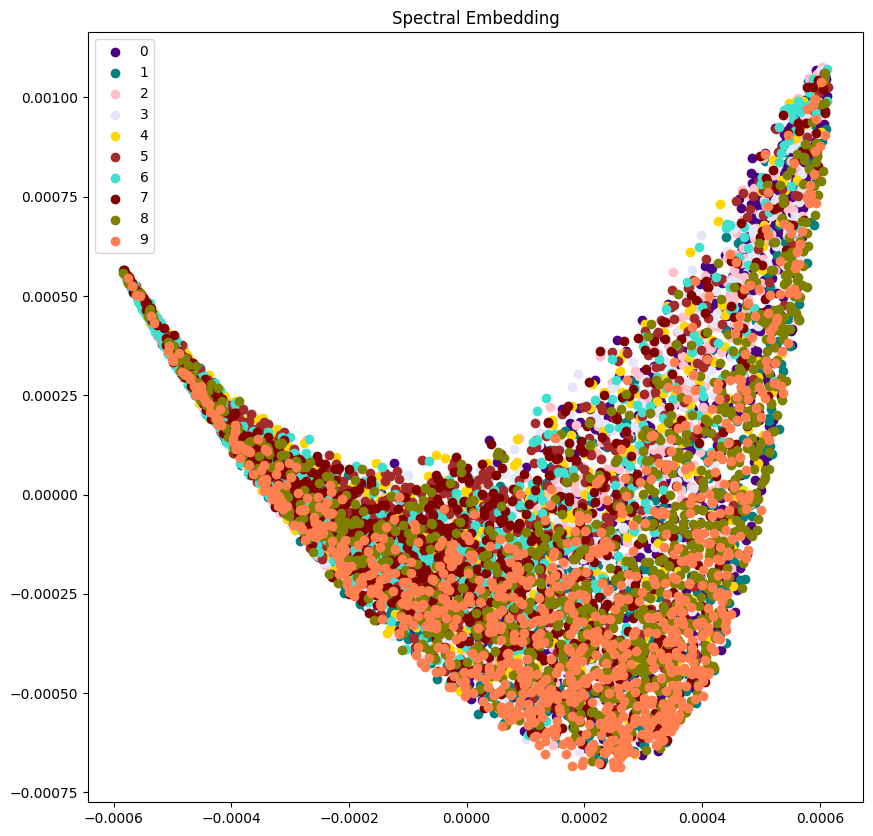

In [21]:
# Perform Spectral Embedding
se = SpectralEmbedding(n_components=2)
x_se = se.fit_transform(x_train_flat)
plot_embedding(x_se, title='Spectral Embedding')

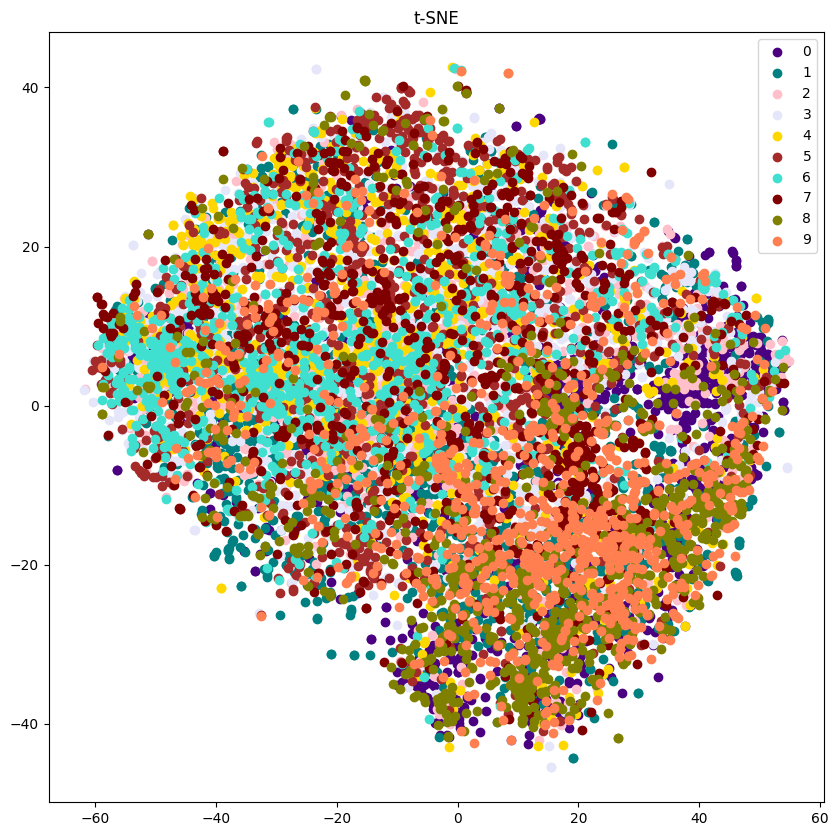

In [22]:
# Perform t-SNE
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_train_flat)
plot_embedding(x_tsne, title='t-SNE')

In [32]:
!pip uninstall umap
!pip install umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/umap/*
Proceed (Y/n)? y
  Successfully uninstalled umap-0.1.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=c783227d5fef4039e1a979c2845a24c0a39ed9f76a9df920f9876a51f5c1b16e
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=13268f1dc8305a60933c1639d88add84ddf8b829730d0

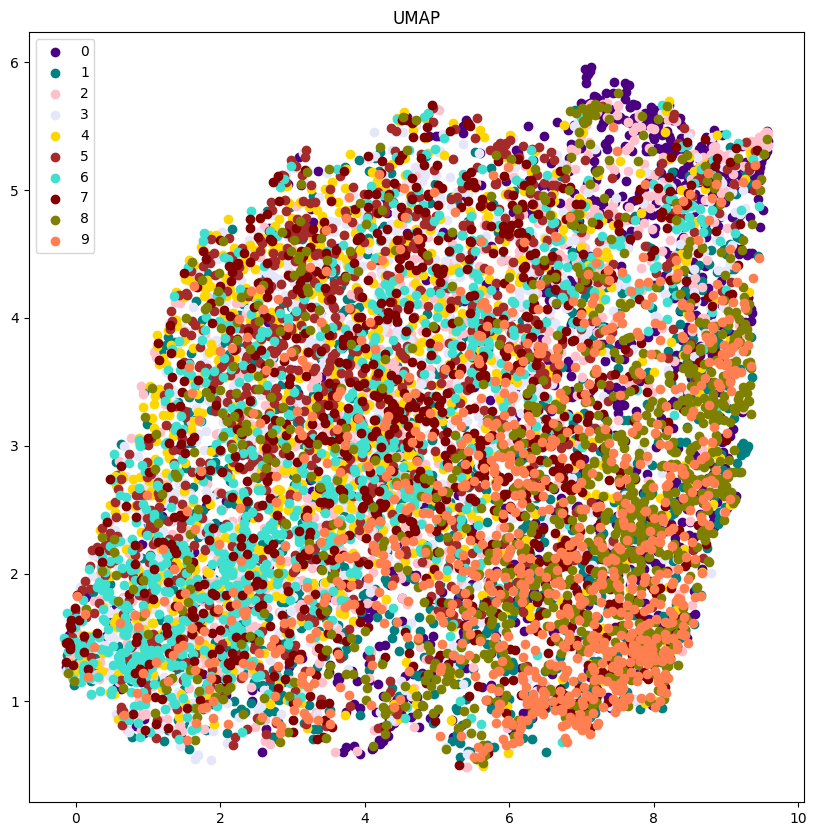

In [33]:
# Perform UMAP
import umap.umap_ as umap
um = umap.UMAP(n_components=2)
x_umap = um.fit_transform(x_train_flat)
plot_embedding(x_umap, title='UMAP')